In [31]:
import utils
import os
import importlib
import random

importlib.reload(utils)

<module 'utils' from '/data/users/zhangjunlei/tyx/reward-by-prm800k/src/utils.py'>

In [2]:
prm800k_all_train_samples = []
for idx, data_files_train in enumerate(utils.prm800k_phase_train_jsonl_paths):
    prm800k_phase_train = utils.load_jsonl(data_files_train)
    prm800k_all_train_samples.extend(prm800k_phase_train)
prm800k_all_train_samples = list(
    filter(utils.pick_prm800k_samples, prm800k_all_train_samples)
)
print(len(prm800k_all_train_samples))
print(prm800k_all_train_samples[0])

87012
{'labeler': 'e90a38f3-3135-4465-87af-3e6322e3d772', 'timestamp': '2022-07-13T18:55:54.496450', 'generation': None, 'is_quality_control_question': False, 'is_initial_screening_question': False, 'question': {'problem': 'How many seconds are in 7.8 minutes?', 'ground_truth_answer': '468'}, 'label': {'steps': [{'completions': [{'text': '7.8 minutes is the same as 7 minutes and 0.8 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}, {'completions': [{'text': 'Right, and since there are 60 seconds in a minute, then there are 60 * 7 = 420 seconds in 7 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}, {'completions': [{'text': 'And since there are 60 seconds in a minute, then there are 60 * 0.8 = 48 seconds in 0.8 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}, {'completions': [{'text': 'So, in total, there are 420 + 48 = 468 seconds in 7.8 minutes.', 'ra

In [3]:
prm800k_all_train_samples_key_by_problem = utils.key_by_problem(
    prm800k_all_train_samples
)
print(len(prm800k_all_train_samples_key_by_problem))

10821


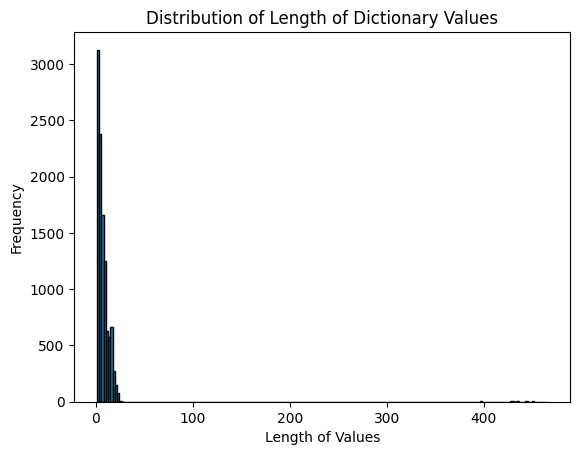

In [7]:
utils.visualize_dict_value_nums_distribuition(prm800k_all_train_samples_key_by_problem)

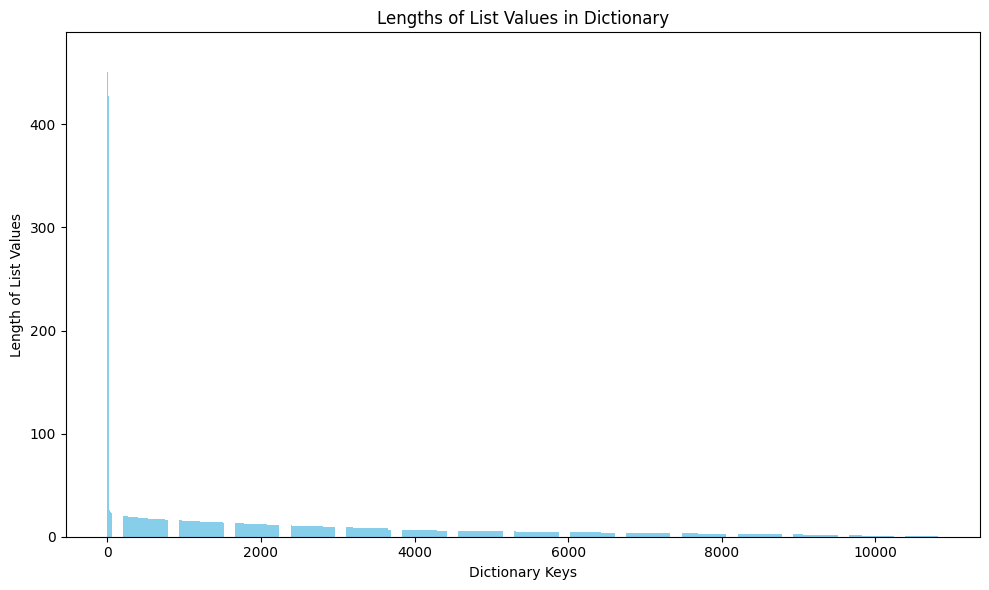

In [32]:
utils.visualize_dict_value_nums(prm800k_all_train_samples_key_by_problem)

In [8]:
random.seed(42)
prm800k_validation_samples_key_by_problem = random.sample(
    prm800k_all_train_samples_key_by_problem.items(),
    int(0.02 * len(prm800k_all_train_samples_key_by_problem)),
)
validation_solutions_key_by_problem = dict(prm800k_validation_samples_key_by_problem)

/tmp/ipykernel_2583470/3434243316.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  prm800k_validation_samples_key_by_problem = random.sample(


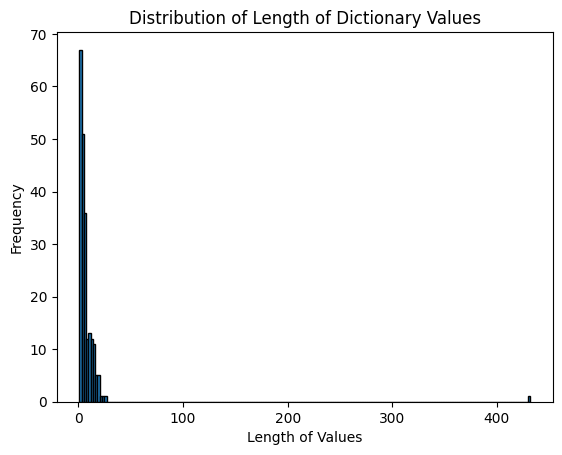

In [9]:
utils.visualize_dict_value_lengths_distribuition(validation_solutions_key_by_problem)

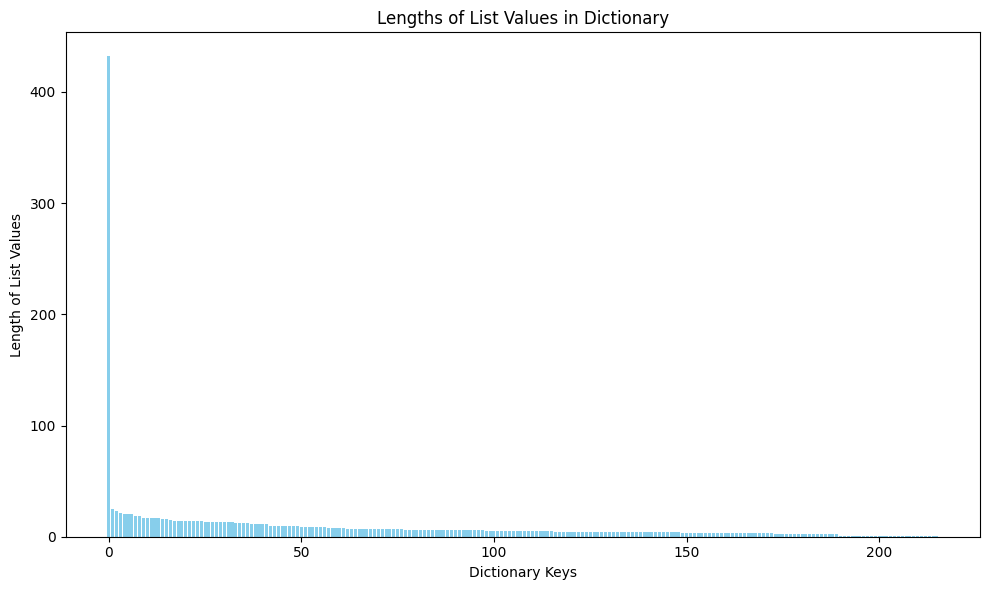

In [33]:
utils.visualize_dict_value_lengths(validation_solutions_key_by_problem)

In [34]:
example = list(prm800k_all_train_samples_key_by_problem.values())[0][0]
print(example["question"])
print(example["label"]["steps"][0])
print(example)

{'problem': 'How many seconds are in 7.8 minutes?', 'ground_truth_answer': '468'}
{'completions': [{'text': '7.8 minutes is the same as 7 minutes and 0.8 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}
{'labeler': 'e90a38f3-3135-4465-87af-3e6322e3d772', 'timestamp': '2022-07-13T18:55:54.496450', 'generation': None, 'is_quality_control_question': False, 'is_initial_screening_question': False, 'question': {'problem': 'How many seconds are in 7.8 minutes?', 'ground_truth_answer': '468'}, 'label': {'steps': [{'completions': [{'text': '7.8 minutes is the same as 7 minutes and 0.8 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}, {'completions': [{'text': 'Right, and since there are 60 seconds in a minute, then there are 60 * 7 = 420 seconds in 7 minutes.', 'rating': 1, 'flagged': False}], 'human_completion': None, 'chosen_completion': 0}, {'completions': [{'text': 'And since there are 60 seconds in a 

In [19]:
train_solutions = []
validation_solutions = []
for solution in prm800k_all_train_samples:
    if solution["question"]["problem"] in validation_solutions_key_by_problem.keys():
        validation_solutions.append(solution)
    else:
        train_solutions.append(solution)

print(len(train_solutions))
print(len(validation_solutions))

85194
1818


In [28]:
def get_rating_nums(solutions):
    rating_nums = {1: 0, 0: 0, -1: 0}
    for solution in solutions:
        reformatted_sample = utils.reformat_prm800k_sample(solution)
        for step_ratings in reformatted_sample["step_ratings"]:
            rating_nums[int(step_ratings["rating"])] += 1

    print(rating_nums)
    return rating_nums


train_rating_nums = get_rating_nums(train_solutions)
validation_rating_nums = get_rating_nums(validation_solutions)

{1: 480575, 0: 44903, -1: 73389}
{1: 8644, 0: 640, -1: 1569}


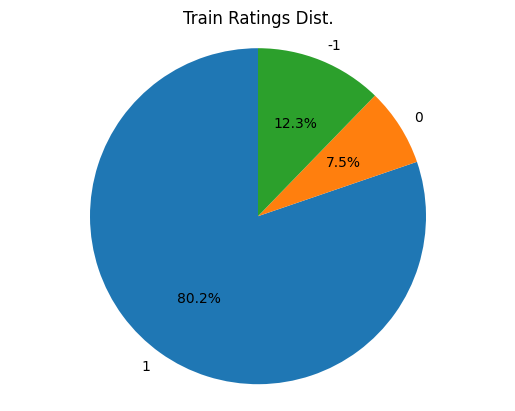

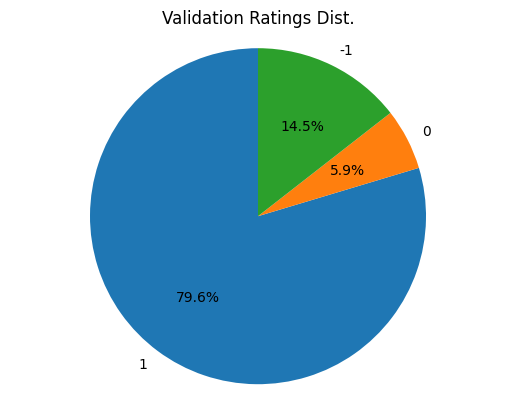

In [30]:
import matplotlib.pyplot as plt


def visualize_class_distribution(data, title="Distribution"):
    # 定义标签和对应的数值
    labels = list(data.keys())
    sizes = list(data.values())

    # 定义颜色
    colors = [f"C{i}" for i in range(len(labels))]

    # 绘制饼状图
    plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

    # 设置图形的纵横比为相等，使饼状图为圆形
    plt.axis("equal")

    # 添加标题
    plt.title(title)

    # 显示图形
    plt.show()


visualize_class_distribution(train_rating_nums, "Train Ratings Dist.")
visualize_class_distribution(validation_rating_nums, "Validation Ratings Dist.")